<p><font size="6"> <span style="color:grau"> <b> Pandas</b></span></font> </br></p> 
<p><font size="5"> <span style="color:grau"> <b> Basics</b></span></font> </br></p> 

**Aufgabe:**

Analysieren Sie die Daten zum *Diabetes Dataset*. Laden Sie die Daten hoch und testen Sie die Pandas Funktionen aus. 

Informationen zum Dataset finden Sie unter dem nachfolgendne Link. 

[Infos](https://www.kaggle.com/datasets/mathchi/diabetes-data-set)



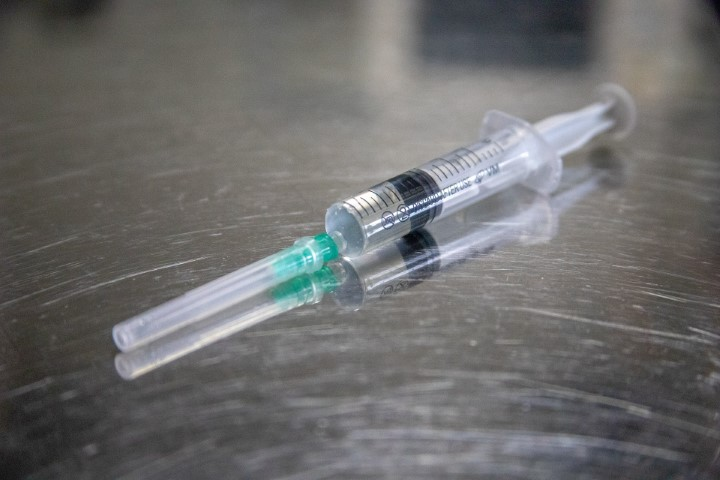

# Modelldaten vorbereiten

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Diabetes Dataset.csv')

In [ ]:
label = 'Outcome'
features = [n for n in df.columns if n != label]

In [ ]:
target = df[label]
data = df[features]

In [ ]:
data.head(4)

# DataFrame - Indizierung

In [ ]:
# Spalte/Series
data['Age']

In [ ]:
# Zeile
data.iloc[100]
data.iloc[100:105]

In [ ]:
# Teilbereiche
data.iloc[100:105,2:4]

In [ ]:
# Teilbereiche alle Zeile, 1-2 Spalte
data.loc[:, 'Age']
data.loc[:,['Age', 'BMI']]
data.loc[:,'Age':'BMI']

In [ ]:
# Teilbereich Zeile 100-105 und Spalten 1 und 2
data.iloc[100:105,0:2]

In [ ]:
# eine Zelle mit loc/iloc
data.iloc[100,0]
data.loc[100,'Age']

# Datenabfrage mit query

In [ ]:
data.query('Age == 14.23')

# DataFrame aufbreiten

In [ ]:
data.isna().sum()   # Detect missing values

In [ ]:
data.fillna(0).sum()                           # Fill NA/NaN values using the specified method. Hier fehlende Werte werden durch 0 ersetzt

In [ ]:
data.isnull().sum()

In [ ]:
data['Age'].replace(14.23,14.99, inplace=True)

# Information zu DataFrames abfragen


In [ ]:
data.describe().T

In [ ]:
data.columns

In [ ]:
data.dtypes

In [ ]:
data.shape

In [ ]:
duplicates = data["Age"].duplicated(keep = 'first')

In [ ]:
data.ndim

In [ ]:
data.size

In [ ]:
data.groupby(['hue']).mean()

# DataFrame konvertieren/transformieren

In [ ]:
data.convert_dtypes()

In [ ]:
# Convert structured or record ndarray to DataFrame.
data = np.array([(3, 'a'), (2, 'b'), (1, 'c'), (0, 'd')],
                dtype=[('col_1', 'i4'), ('col_2', 'U1')])
pd.DataFrame.from_records(data)


In [ ]:
# Konvertierung z.B. der Iris-Klassen von String in einen numerischen Wert 
# Hilfreich um direkt KJorrelation zwischen einzelnen Features und Label zu berechnen
# nicht integriert in Daten Zeilen oberhalb !!!!!
data.insert(5, "neue Spalte", pd.factorize(data['Spalte'])[0] + 1)

In [ ]:
data.to_numpy

In [ ]:
data.to_records

In [ ]:
data.to_string

In [ ]:
data.to_dict()  # Convert the DataFrame to a dictionary.

In [ ]:
data.to_json(orient='columns') # Convert the DataFrame to json.

In [ ]:
import tabulate
data.to_markdown(tablefmt="grid")

In [ ]:
pd.pivot_table(data, index=['sepal length (cm)', 'sepal width (cm)'],
                    columns=['petal length (cm)'])


In [ ]:
data_np = data.values                   # Return a Numpy representation of the DataFrame.      
data_np2 = data_np.reshape(-1,1)        # Matrixelemte werden in n-Zeilem und m-Spalten neu strukturiert, hier nur n Zeilen und 1 Spalte
data_np2

In [ ]:
data.groupby(['sepal length (cm)']).mean()

# DataFrames copy, insert, delete, drop

In [ ]:
data_neu = data.copy()
data_neu.shape

In [ ]:
data.insert(4, "target", iris.target)


In [ ]:
data.pop('target')  # Return item and delete from frame.

In [ ]:
data.drop(['target'], axis=1)# return frame without specified column  - not delete

In [ ]:
data.dropna()   # Remove missing values. axis{0 or ‘index’, 1 or ‘columns’}, default 0

# DataFrames iterieren

In [ ]:
# Iterate over (column name, Series) pairs.
for label, content in data.items():
    print(f'label: {label}')
    print(f'content: {content}', sep='\n')

In [ ]:
for row in data.itertuples():
    print(row)

# DataFrames logische Operatoren

In [ ]:
data.isin([6.2])     # Whether each element in the DataFrame is contained in values, return true/false


In [ ]:
data == 6.2

In [ ]:
data >= 5.0

# DataFrames arithmetische Operatoren

In [ ]:
data.add(100)

In [ ]:
data.sub(100)

In [ ]:
data['sepal length (cm)'].divide(100)

In [ ]:
import numpy as np
data.apply(np.sum, axis=0)

In [ ]:
data.transform(lambda x: x + 1)

# DataFrame Statsitik

In [ ]:
data.corr(method='pearson')
data.corr(method='spearman')


In [ ]:
data.corrwith(data['Age'])             # method{‘pearson’, ‘kendall’, ‘spearman’} or callable


In [ ]:
data.count()

In [ ]:
data.cov()

In [ ]:
data.std()

In [ ]:
data.describe().T